# Causality Tutorial Exercises – Python

Contributors: Rune Christiansen, Jonas Peters, Niklas Pfister, Sorawit Saengkyongam, Sebastian Weichwald.
The MIT License applies; copyright is with the authors.
Some exercises are adapted from "Elements of Causal Inference: Foundations and Learning Algorithms" by J. Peters, D. Janzing and B. Schölkopf.


# Exercise 1 – Structural Causal Model



Let's first draw a sample from an SCM

In [ ]:
import numpy as np

# set seed
np.random.seed(1)

rnorm = lambda n: np.random.normal(size=n)

n = 200
C = rnorm(n)
A = .8 * rnorm(n)
K = A + .1 * rnorm(n)
X = C - 2 * A + .2 * rnorm(n)
F = 3 * X + .8 * rnorm(n)
D = -2 * X + .5 * rnorm(n)
G = D + .5 * rnorm(n)
Y = 2 * K - D + .2 * rnorm(n)
H = .5 * Y + .1 * rnorm(n)

data = np.c_[C, A, K, X, F, D, G, Y, H]

__a)__

What are the parents and children of $X$ in the above SCM ?

Take a pair of variables and think about whether you expect this pair to be dependent
(at this stage, you can only guess, later you will have tools to know). Check empirically.

__b)__

Generate a sample of size 300 from the interventional distribution $P_{\mathrm{do}(X=\mathcal{N}(2, 1))}$
and store the data matrix as `data_int`.

__c)__

Do you expect the marginal distribution of $Y$ to be different in both samples?

Double-click (or enter) to edit

__d)__

Do you expect the joint distribution of $(A, Y)$ to be different in both samples?


Double-click (or enter) to edit

__e)__

Check your answers to c) and d) empirically.

# Exercise 2 – Adjusting


![DAG](https://raw.githubusercontent.com/sweichwald/causality-tutorial-exercises/main/data/Exercise-ANM.png)

Suppose we are given a fixed DAG (like the one above).

a) What are valid adjustment sets (VAS) used for?

b) Assume we want to find a VAS for the causal effect from $X$ to $Y$.
What are general recipies (plural 😉) for constructing VASs (no proof)?
Which sets are VAS in the DAG above?

c) The following code samples from an SCM. Perform linear regressions using different VAS and compare the regression coefficient against the causal effect from $X$ to $Y$.


In [ ]:
import numpy as np

# set seed
np.random.seed(1)

rnorm = lambda n: np.random.normal(size=n)

n = 200
C = rnorm(n)
A = .8 * rnorm(n)
K = A + .1 * rnorm(n)
X = C - 2 * A + .2 * rnorm(n)
F = 3 * X + .8 * rnorm(n)
D = -2 * X + .5 * rnorm(n)
G = D + .5 * rnorm(n)
Y = 2 * K - D + .2 * rnorm(n)
H = .5 * Y + .1 * rnorm(n)

data = np.c_[C, A, K, X, F, D, G, Y, H]

d) Why could it be interesting to have several options for choosing a VAS?

e) If you indeed have access to several VASs, what would you do?

# Exercise 3 – Independence-based Causal Structure Learning

__a)__

Assume $P^{X,Y,Z}$ is Markov and faithful wrt. $G$. Assume all (!) conditional independences are

$$
\newcommand{\indep}{{\,⫫\,}}
\newcommand{\dep}{\not{}\!\!\indep}
$$

$$X \indep Z \mid \emptyset$$

(plus symmetric statements). What is $G$?

__b)__

Assume $P^{W,X,Y,Z}$ is Markov and faithful wrt. $G$. Assume all (!) conditional independences are

$$\begin{aligned}
(Y,Z) &\indep W \mid \emptyset \\
W &\indep Y \mid (X,Z) \\
(X,W) &\indep Y | Z
\end{aligned}
$$

(plus symmetric statements). What is $G$?

# Exercise 4 – Additive Noise Models

Set-up required packages:

In [ ]:
# set up – not needed when run on mybinder
# if needed (colab), change False to True and run cell
if False:
  !mkdir ../data/
  !wget https://raw.githubusercontent.com/sweichwald/causality-tutorial-exercises/main/data/Exercise-ANM.csv -q -O ../data/Exercise-ANM.csv
  !wget https://raw.githubusercontent.com/sweichwald/causality-tutorial-exercises/main/python/kerpy/__init__.py -q -O kerpy.py
  !pip install pygam

In [ ]:
from kerpy import hsic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pygam import GAM, s

Let's load and plot some real data set:

In [ ]:
data = pd.read_csv('../data/Exercise-ANM.csv')

plt.scatter(data["X"].values, data["Y"].values, s=2.);

__a)__

Do you believed that $X \to Y$ or that $X \gets Y$? Why?

Double-click (or enter) to edit

$$
\newcommand{\indep}{{\,⫫\,}}
\newcommand{\dep}{\not{}\!\!\indep}
$$

__b)__
Let us now try to get a more statistical answer. We have heard that we cannot 
have  
$$Y = f(X) + N_Y,\ N_Y \indep X$$
and
$$X = g(Y) + N_X,\ N_X \indep Y$$
at the same time.

Given a data set over $(X,Y)$,
we now want to decide for one of the two models. 

Come up with a method to do so.

Hints: 
* `GAM(s(0)).fit(A, B).deviance_residuals(A, B)` provides residuals when regressing $B$ on $A$.
* `hsic(a, b)` can be used as an independence test (here, `a` and `b` are $n \times 1$ numpy arrays).

__c)__

Assume that the error terms are Gaussian with zero mean and variances 
$\sigma_X^2$ and $\sigma_Y^2$, respectively.
The maximum likelihood for DAG G is 
then proportional to 
$-\log(\mathrm{var}(R^G_X)) - \log(\mathrm{var}(R^G_Y))$,
where $R^G_X$ and $R^G_Y$ are the residuals obtained from regressing $X$ and $Y$ on 
their parents in $G$, respectively (no proof).

Find the maximum likelihood solution.

# Exercise 5 – Invariant Causal Prediction

Set-up required packages and data:

In [ ]:
# set up – not needed when run on mybinder
# if needed (colab), change False to True and run cell
if False:
  !mkdir ../data/
  !wget https://raw.githubusercontent.com/sweichwald/causality-tutorial-exercises/main/data/Exercise-ICP.csv -q -O ../data/Exercise-ICP.csv

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

__a)__

Generate some observational and interventional data:

In [ ]:
# Generate n=1000 observations from the observational distribution
na = 1000
Xa = np.random.normal(size=na)
Ya = 1.5*Xa + np.random.normal(size=na)

# Generate n=1000 observations from an interventional distribution
nb = 1000
Xb = np.random.normal(loc=2, scale=1, size=nb)
Yb = 1.5*Xb + np.random.normal(size=nb)

# plot Y vs X1
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(Xa, Ya, label='observational', marker='o', alpha=0.6)
ax.scatter(Xb, Yb, label='interventional', marker ='^', alpha=0.6)
ax.legend();

Look at the above plot. Is the predictor $\{X\}$ an invariant set, that is (roughly speaking), does $Y \mid X = x$ have the same distribution in the orange and blue data?

Double-click (or enter) to edit

__b)__

We now consider data over a response and three covariates $X1, X2$, and $X3$
and try to infer $\mathrm{pa}(Y)$. To do so, we need to find all sets for which this
invariance is satisfied.

In [ ]:
# load data
data = pd.read_csv('../data/Exercise-ICP.csv')
data['env'] = np.concatenate([np.repeat('observational', 140), np.repeat('interventional', 80)])
# pairplot
sns.pairplot(data, hue='env', height=2, plot_kws={'alpha':0.6});

In [ ]:
# The code below plots the residuals versus fitted values for all sets of 
# predictors. 
# extract response and predictors

Y = data['Y'].to_numpy()
X = data[['X1','X2','X3']].to_numpy()
# get environment indicator
obs_ind = data[data['env'] == 'observational'].index
int_ind = data[data['env'] == 'interventional'].index
# create all sets
all_sets = [(0,), (1,), (2,), (0,1), (0,2), (1,2), (0,1,2)]
# label each set
set_labels = ['X1', 'X2', 'X3', 'X1,X2', 'X1,X3', 'X2,X3', 'X1,X2,X3']

# fit OLS and store fitted values and residuals for each set
fitted = []
resid = []
for s in all_sets:
  model = sm.OLS(Y, X[:, s]).fit()
  fitted += [model.fittedvalues]
  resid += [model.resid]

# plotting function
def plot_fitted_resid(fv, res, ax, title):
  ax.scatter(fv[obs_ind], res[obs_ind], label='observational', marker='o', alpha=0.6)
  ax.scatter(fv[int_ind], res[int_ind], label='interventional', marker ='^', alpha=0.6)
  ax.legend()
  ax.set_xlabel('fitted values')
  ax.set_ylabel('residuals')
  ax.set_title(title)

# creating plots
fig, axes = plt.subplots(4, 2, figsize=(7,14))

# plot result for the empty set predictor
ax0 = axes[0,0]
ax0.scatter(obs_ind, Y[obs_ind], label='observational', marker='o', alpha=0.6)
ax0.scatter(int_ind, Y[int_ind], label='interventional', marker ='^', alpha=0.6)
ax0.legend()
ax0.set_xlabel('index')
ax0.set_ylabel('Y')
ax0.set_title('empty set')

# plot result for the other sets
for i, ax in enumerate(axes.flatten()[1:]):
  plot_fitted_resid(fitted[i], resid[i], ax, set_labels[i])

# make tight layout
plt.tight_layout()

Which of the sets are invariant? (There are two plots with four scatter plots each.)

Double-click (or enter) to edit

__c)__
What is your best guess for $\mathrm{pa}(Y)$?

Double-click (or enter) to edit

__d) (optional)__

Use the function ICP to check your result.

In [ ]:
# set up – not needed when run on mybinder
# if needed (colab), change False to True and run cell
if False:
  !pip install causalicp

In [ ]:
import causalicp as icp

# Exercise 6 - Confounding and selection bias

### Generate data

We start by generating data from the following SCM

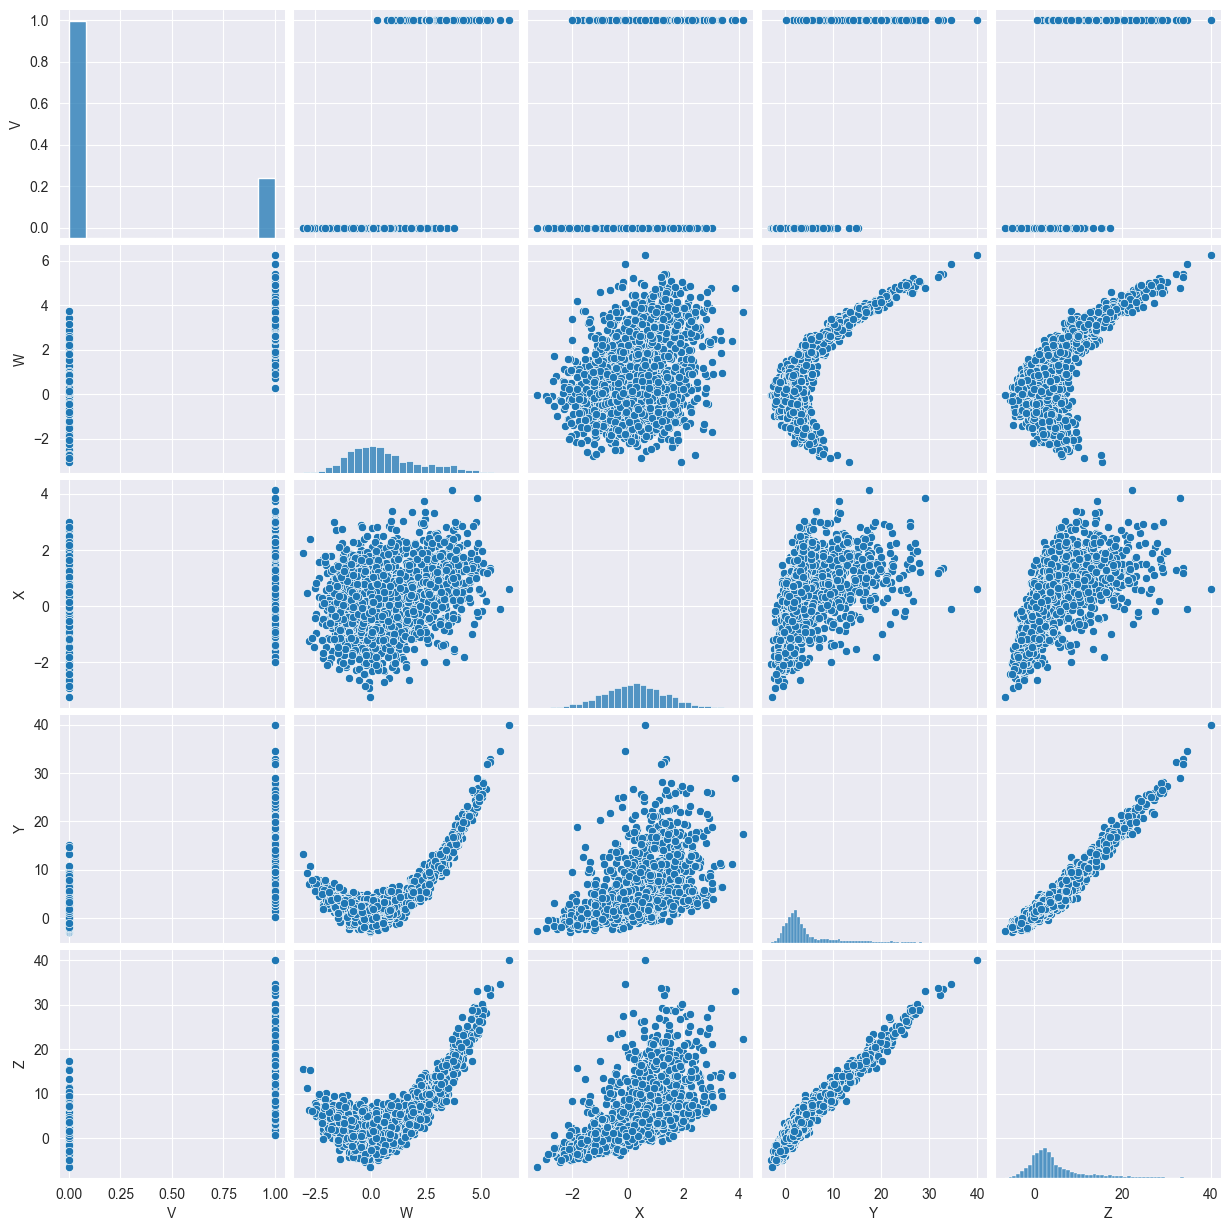

In [26]:
import numpy as np
import seaborn as sns
import pandas as pd

def generate_data(seed):
    np.random.seed(seed)
    n = 200
    V = np.random.binomial(1, 0.2, n)
    W = 3*V + np.random.normal(size=n)
    X = V + np.random.normal(size=n)
    Y = X + W**2 + 1 + np.random.normal(size=n)
    Z = X + Y + np.random.normal(size=n)
    data = np.c_[V, W, X, Y, Z]
    return data

data = generate_data(1)

# Visualize data set
data = pd.DataFrame(data, columns=['V', 'W', 'X', 'Y', 'Z'])
sns.pairplot(data);

Assume now that we know the causal ordering induced by the SCM and that
* $X$ is a treatment variable,
* $Y$ is the response and
* $(V, W, Z)$ are additional covariates.

Furthermore we will assume a partially linear outcome model, i.e., 
$$Y = \theta X + g(V, W) + \epsilon\quad \text{with}\quad\mathbb{E}[\epsilon\mid X, V, W]=0.$$

We are interested in estimating the causal effect of $X$ on $Y$, corresponding to the parameter $\theta$ in the partially linear model.

### Background: Confounding and selection bias

Ignoring the causal structure can lead to wrong conclusions. In the following exercise, we will see the two most important types of bias that may occur:
* **Confounding bias:** Bias arising because of unaccounted variables that have an effect on both treatment and response.
* **Selection bias:** Bias arising due to conditioning on descendents of the response. This can occur either if we only observe a subset of the entire sample or if we mistakenly include a descendent of the response in the outcome model.

### Exercises

### (a)

In the code below we fitted several different outcome models. Compare the resulting coefficients for $X$. Which regressions appear to lead to unbiased estimates of the causal effect?

In [27]:
import statsmodels.api as sm
from pygam import LinearGAM, s, l

# Fit linear models
lin_YX = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
lin_YXV = sm.OLS(data['Y'], sm.add_constant(data[['X', 'V']])).fit()
lin_YXW = sm.OLS(data['Y'], sm.add_constant(data[['X', 'W']])).fit()

# Print gam parameters
gam_YW = LinearGAM(l(0) + s(1)).fit(data[['X', 'W']], data['Y'])

# GAM model of Y on X, V and s(W)
gam_YVW = LinearGAM(l(0) + l(1) + s(2)).fit(data[['X', 'V', 'W']], data['Y'])

# GAM model of Y on X, s(W), s(Z)
gam_YWZ = LinearGAM(l(0) + s(1) + s(2)).fit(data[['X', 'W', 'Z']], data['Y'])

# Print each model's coefficient for X
print('Linear model of Y on X:', lin_YX.params['X'])
print('Linear model of Y on X and V:', lin_YXV.params['X'])
print('Linear model of Y on X and W:', lin_YXW.params['X'])
print('GAM model of Y on X and W:', gam_YW.coef_[0])
print('GAM model of Y on X, V and W:', gam_YVW.coef_[0])
print('GAM model of Y on X, W and Z:', gam_YWZ.coef_[0])

Linear model of Y on X: 2.337826860016949
Linear model of Y on X and V: 1.0484575446923476
Linear model of Y on X and W: 1.3110731247521064
GAM model of Y on X and W: 0.9904061214071169
GAM model of Y on X, V and W: 0.9913930640954591
GAM model of Y on X, W and Z: 0.007669556154125318


#### Solution

Double-click (or enter) to edit

### (b)
List all valid adjustment sets for this causal structure.

#### Solution

Double-click (or enter) to edit

### (c)
Assume now that you only have access to the subset $\texttt{data_cond}$ constructed in the code snippet below. Use a gam regression Y ~ X + s(W) to estimate the causal effect. What do you observe?

In [35]:
data_cond = data[data['Z'] < 1]

#### Solution

Double-click (or enter) to edit